# Case Study - Diamond Price Prediction


Business Understanding:

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

# Problem Statement
Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and predicts the price of diamond.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df=pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# Data Description

# Exploratory Data Analysis

In [4]:
df.shape

(53940, 10)

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


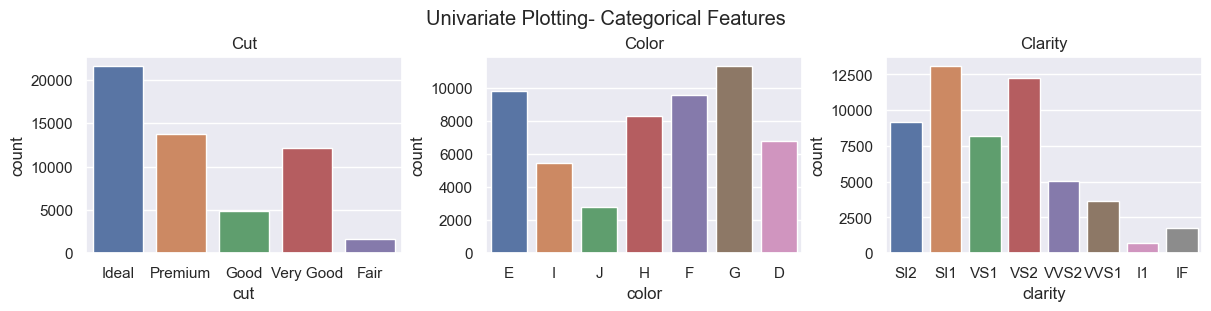

In [9]:
#Univariate- Categorical Analysis

fig, axs=plt.subplots(1,3, figsize=(12,3), constrained_layout=True)
fig.suptitle("Univariate Plotting- Categorical Features")

axs[0].set_title('Cut')
sns.countplot(data=df,x='cut',ax=axs[0])

axs[1].set_title('Color')
sns.countplot(data=df,x='color',ax=axs[1])

axs[2].set_title('Clarity')
sns.countplot(data=df,x='clarity',ax=axs[2])

plt.show()

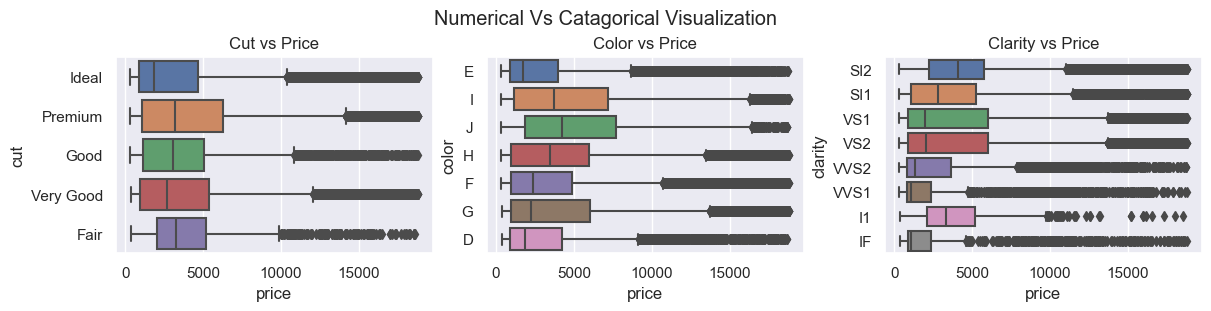

In [10]:
#Bivariate- Categorical vs Numerical Analysis

fig, axs=plt.subplots(1,3, figsize=(12,3), constrained_layout=True)
fig.suptitle("Numerical Vs Catagorical Visualization")

axs[0].set_title('Cut vs Price')
sns.boxplot(data=df,x='price',y='cut',ax=axs[0])

axs[1].set_title('Color vs Price')
sns.boxplot(data=df,x='price',y='color',ax=axs[1])

axs[2].set_title('Clarity vs Price')
sns.boxplot(data=df,x='price',y='clarity',ax=axs[2])

plt.show()

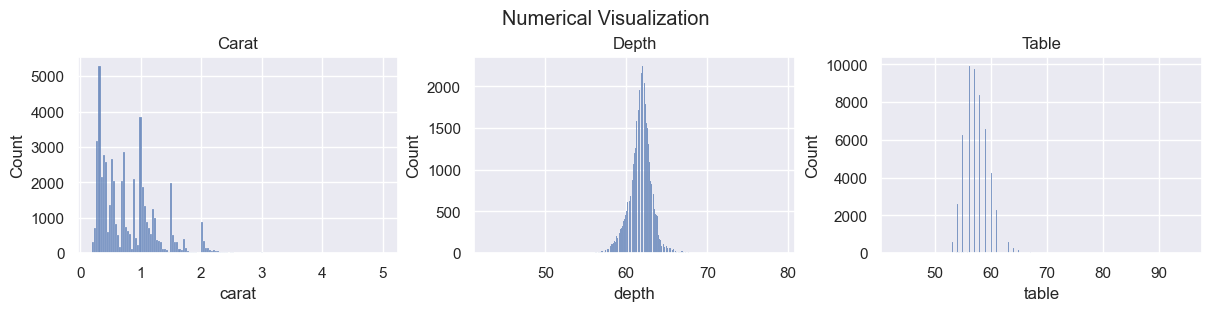

In [11]:
#Univariate- Numerical analysis

fig, axs=plt.subplots(1,3, figsize=(12,3), constrained_layout=True)
fig.suptitle("Numerical Visualization")

axs[0].set_title('Carat')
sns.histplot(data=df,x='carat',ax=axs[0])

axs[1].set_title('Depth')
sns.histplot(data=df,x='depth',ax=axs[1])

axs[2].set_title('Table')
sns.histplot(data=df,x='table',ax=axs[2])

plt.show()

C:\Users\yuvraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


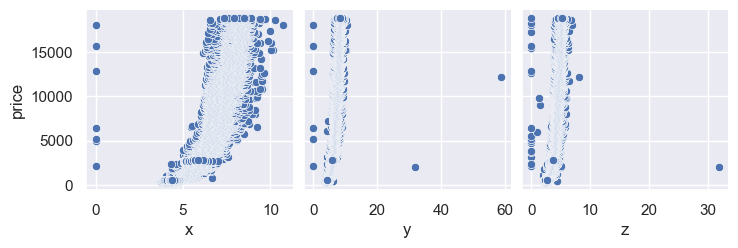

In [12]:
#Bivariate Numerical Vs Numerical
sns.pairplot(data=df,
            x_vars=['x','y','z'],
            y_vars='price')

plt.show()

# Data Preparation and Model Building Pipeline

* Identifying the inputs (X) and output (y)
* Split into train and test (X_train, X_test, y_train, y_test)
* Data Preparation: Data Cleaning and Feature Engineering.
* Clean the training data
* Preprocess the training data (X_train_transformed)
* Training Phase: Build a model
* Preprocess the test data (X_test_transformed)
* Predict on unseen data
* Evaluate the model performance

In [13]:
#Installing Scikit Learn
!pip install -U scikit-learn

In [14]:
import sklearn
print(sklearn.__version__)

1.5.2


# Segregate Inputs(X) and Output(y)

In [15]:
X=df.drop(columns=['price'])
y=df['price']

# Split Data Into Train And Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


# Apply Data Preparation on Training Data

* Separate Numerical and Categorical Features
* Feature Engineering/Extraction/Transformation
   * Applying Standardization on Numerical Features
   * Apply LabelEncoding on Categorical Features

In [17]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [18]:
#Separating Categorical and Numerical Columns

X_train_cat= X_train.select_dtypes(include=['object'])
X_train_num= X_train.select_dtypes(include=['int64','float64'])

In [19]:
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [20]:
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


# Numerical Feature Transformation: Applying Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

std_scaler= StandardScaler()

X_train_num_transformed= pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                     columns=std_scaler.get_feature_names_out(),
                                     index=X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


In [22]:
#Analyse the properties of 'std_scaler'

print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Output Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 6
Output Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.79755135 61.75490051 57.45233469  5.72994018  5.73356989  3.53818267]
Std of each column: [0.47428986 1.43216771 2.22888453 1.1225301  1.15188634 0.7097527 ]


In [23]:
X_train_num_transformed.describe().round(2)   # round(2): This rounds all the numerical values in the output of .describe() to 2 decimal places, making the summary easier to read.

,carat,depth,table,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.10,-6.48,-5.10,-4.98,-4.99
25%,-0.84,-0.46,-0.65,-0.91,-0.88,-0.89
50%,-0.21,0.10,-0.20,-0.04,-0.02,-0.03
75%,0.51,0.52,0.69,0.72,0.70,0.71
max,8.88,12.04,9.67,4.46,46.16,39.82


# Categorical Feature Transformation: Applying Ordinal Encoding

In [24]:
# We used Ordinal Encoding Because Three Categorical Features are Ordinal

# Define the ordering for categorical columns (lowest to highest)

cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1, 
                                 encoded_missing_value=-5)

X_train_cat_transformed= pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                                     columns= ordinal_encoder.get_feature_names_out(),
                                     index= X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
441,3.0,2.0,1.0
50332,2.0,6.0,2.0
35652,4.0,3.0,5.0
9439,2.0,2.0,4.0
15824,1.0,4.0,3.0


In [26]:
#Analyse the properties of 'ordinal_encoder'

print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print("Unique Categories:", ordinal_encoder.categories_)
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object), array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object), array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)]
Feature Names after encoding: ['cut' 'color' 'clarity']


# Concatinate The X_train_num_transformed and X_train_cat_transformed

In [27]:
X_train_transformed= pd.concat([X_train_num_transformed, X_train_cat_transformed],axis=1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,3.0,2.0,1.0
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,2.0,6.0,2.0
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4.0,3.0,5.0
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,2.0,2.0,4.0
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,1.0,4.0,3.0


# Applying Data Preparation on Test Data

In [28]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [29]:
# Applying transformation on Numerical data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064


In [30]:
# Apply transformation on Categorical data

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat), 
                                   columns = ordinal_encoder.get_feature_names_out(), 
                                   index = X_test_cat.index)

X_test_cat_transformed.head()

,cut,color,clarity
10176,4.0,2.0,1.0
16083,4.0,2.0,2.0
13420,3.0,1.0,2.0
20407,4.0,4.0,2.0
8909,2.0,4.0,3.0


In [31]:
# Concatinate\ing X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657,4.0,2.0,1.0
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803,4.0,2.0,2.0
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283,3.0,1.0,2.0
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144,4.0,4.0,2.0
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064,2.0,4.0,3.0


# Training and Testing Phase

### Linear Regression ###

In [32]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 806.1632101815305

CPU times: total: 31.2 ms
Wall time: 7.28 s


In [33]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
10176,4733,5131.107679
16083,6424,7294.764679
13420,5510,6025.770217
20407,8770,9927.067650
8909,4493,4732.652453
...,...,...
52283,2494,3348.611770
10789,4861,4480.310760
1190,2932,3870.804522
3583,3422,4198.061830


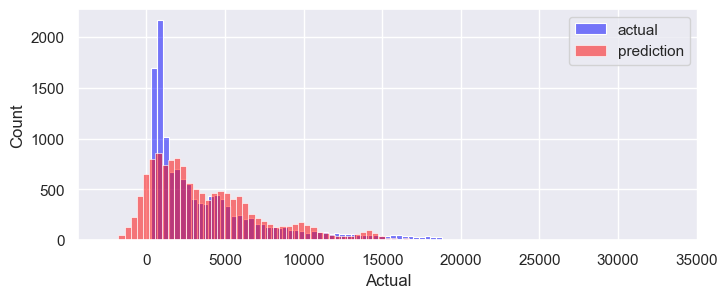

In [34]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### KNN Regression ###

In [35]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 381.08851316277344

CPU times: total: 500 ms
Wall time: 5.28 s


In [36]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
10176,4733,5131.107679,4664.4
16083,6424,7294.764679,6278.2
13420,5510,6025.770217,5180.8
20407,8770,9927.067650,12080.0
8909,4493,4732.652453,6015.2
...,...,...,...
52283,2494,3348.611770,2445.2
10789,4861,4480.310760,4301.8
1190,2932,3870.804522,3569.6
3583,3422,4198.061830,3228.2


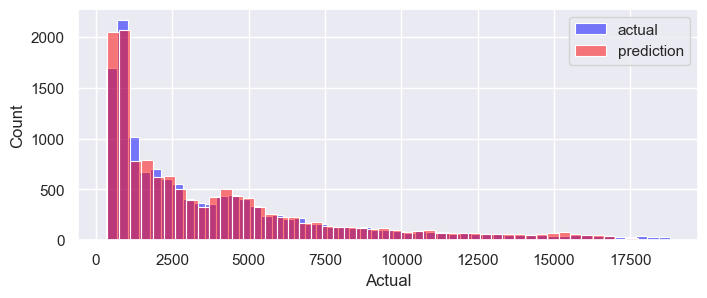

In [37]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Decision Tree Regression ###

In [38]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 351.99555061179086

CPU times: total: 250 ms
Wall time: 3.33 s


In [39]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
10176,4733,5131.107679,4664.4,4662.0
16083,6424,7294.764679,6278.2,7036.0
13420,5510,6025.770217,5180.8,5098.0
20407,8770,9927.067650,12080.0,12182.0
8909,4493,4732.652453,6015.2,4134.0
...,...,...,...,...
52283,2494,3348.611770,2445.2,2469.0
10789,4861,4480.310760,4301.8,4166.0
1190,2932,3870.804522,3569.6,2721.0
3583,3422,4198.061830,3228.2,2852.0


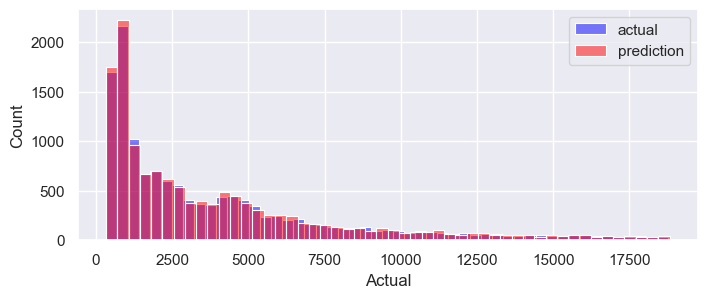

In [40]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Random Forest Regression ###

In [41]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 268.81839457063353

CPU times: total: 16.3 s
Wall time: 40.7 s


In [42]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
10176,4733,5131.107679,4664.4,4662.0,4766.77
16083,6424,7294.764679,6278.2,7036.0,7114.05
13420,5510,6025.770217,5180.8,5098.0,5290.92
20407,8770,9927.067650,12080.0,12182.0,11197.89
8909,4493,4732.652453,6015.2,4134.0,4697.92
...,...,...,...,...,...
52283,2494,3348.611770,2445.2,2469.0,2393.02
10789,4861,4480.310760,4301.8,4166.0,4450.65
1190,2932,3870.804522,3569.6,2721.0,3089.53
3583,3422,4198.061830,3228.2,2852.0,2913.14


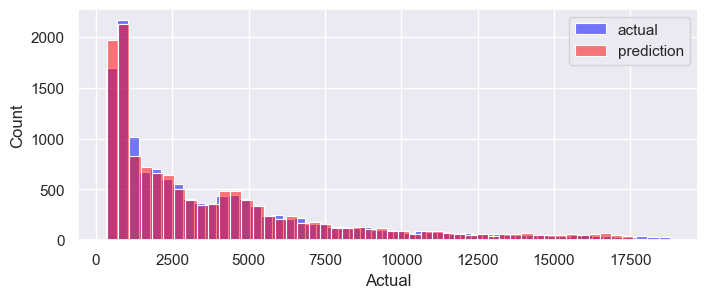

In [43]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

# Comparing all the Models

In [44]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,4733.0
1,Actual,6424.0
2,Actual,5510.0
3,Actual,8770.0
4,Actual,4493.0


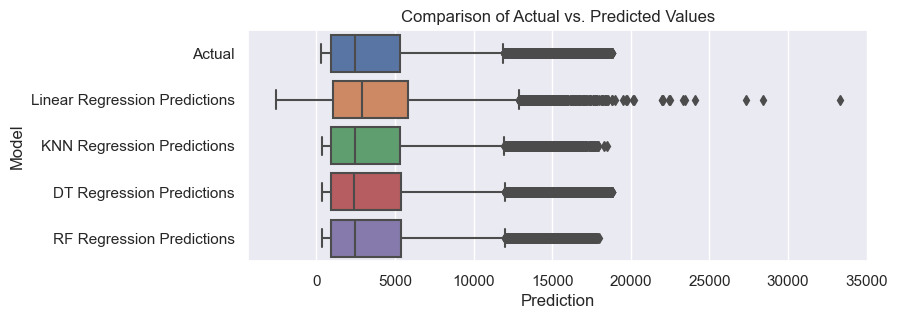

In [45]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()